In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
import seaborn as sns
import sys

warnings.filterwarnings('ignore')
%matplotlib inline

Loading Data

In [2]:
df_data = pd.read_csv('connectivity_task.csv')

In [3]:
df_data.head()

,event_time,event_type,organisation_name,place_name,asset_name,asset_type,module_id
0,2021-02-21 05:53:05,Connected,Gonzalez-Hancock,Thompson Group,EB-FVF-50,5,NaN
1,2021-02-19 05:53:02,Disconnected,Larson-Mccall,Cohen PLC,FI-DMS-52,8,NaN
2,2021-02-19 10:53:05,Connected,Larson-Mccall,Cohen PLC,GV-WTD-14,8,NaN
3,2021-02-22 18:30:09,Connected,"Taylor, Flores and Douglas",Matthews-Phillips,PD-PFG-92,3,NaN
4,2021-02-16 09:31:11,Connected,Larson-Mccall,Benson Ltd,MO-RQJ-49,8,NaN


In [4]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19559 entries, 0 to 19558
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   event_time         19537 non-null  object
 1   event_type         19537 non-null  object
 2   organisation_name  19559 non-null  object
 3   place_name         19559 non-null  object
 4   asset_name         19559 non-null  object
 5   asset_type         19559 non-null  int64 
 6   module_id          1531 non-null   object
dtypes: int64(1), object(6)
memory usage: 1.0+ MB


* Number of null values

In [5]:
nan_values = len(df_data) - df_data.count()
print(nan_values)

event_time              22
event_type              22
organisation_name        0
place_name               0
asset_name               0
asset_type               0
module_id            18028
dtype: int64


# Data Cleaning

* Drop rows with nan values at event_time & event_type

In [6]:
print('number of rows that have nan in event_time column: ', len(df_data[df_data['event_time'].isnull()]))
rows_with_nan_eventime = df_data[df_data['event_time'].isnull()]
# drop rows with nan values in event_time
df_data = df_data[df_data['event_time'].notna()]
print('number of rows without nan in event_time',len(df_data))


number of rows that have nan in event_time column:  22
number of rows without nan in event_time 19537


* Convert event_time from string to pandas datetime

In [7]:
df_data["event_time"]= pd.to_datetime(df_data["event_time"],  format= "%Y-%m-%d %H:%M:%S") 


* set event_time to be the index

In [8]:
df_data.set_index('event_time', inplace=True)

In [9]:
df_data.head()

,event_type,organisation_name,place_name,asset_name,asset_type,module_id
event_time,,,,,,
2021-02-21 05:53:05,Connected,Gonzalez-Hancock,Thompson Group,EB-FVF-50,5,NaN
2021-02-19 05:53:02,Disconnected,Larson-Mccall,Cohen PLC,FI-DMS-52,8,NaN
2021-02-19 10:53:05,Connected,Larson-Mccall,Cohen PLC,GV-WTD-14,8,NaN
2021-02-22 18:30:09,Connected,"Taylor, Flores and Douglas",Matthews-Phillips,PD-PFG-92,3,NaN
2021-02-16 09:31:11,Connected,Larson-Mccall,Benson Ltd,MO-RQJ-49,8,NaN


In [10]:
df_data['asset_type'].unique() 

array([5, 8, 3], dtype=int64)

In [11]:
df_data.describe(include='all')

,event_type,organisation_name,place_name,asset_name,asset_type,module_id
count,19537,19537,19537,19537,19537.000000,1531
unique,2,3,33,60,NaN,9
top,Connected,Larson-Mccall,Cohen PLC,ND-IRJ-15,NaN,598-84-6937
freq,13949,8127,7484,4571,NaN,1173
mean,NaN,NaN,NaN,NaN,6.488714,NaN
std,NaN,NaN,NaN,NaN,2.144644,NaN
min,NaN,NaN,NaN,NaN,3.000000,NaN
25%,NaN,NaN,NaN,NaN,5.000000,NaN
50%,NaN,NaN,NaN,NaN,8.000000,NaN
75%,NaN,NaN,NaN,NaN,8.000000,NaN


In [12]:
df_data.describe(include = ['O'])

,event_type,organisation_name,place_name,asset_name,module_id
count,19537,19537,19537,19537,1531
unique,2,3,33,60,9
top,Connected,Larson-Mccall,Cohen PLC,ND-IRJ-15,598-84-6937
freq,13949,8127,7484,4571,1173


# Data Visualization

event_type
Connected       13949
Disconnected     5588
dtype: int64


([<matplotlib.patches.Wedge at 0x1602c4e7760>,
 [Text(0.5022164840658977, 0.9786616387355173, 'Gonzalez-Hancock'),
  Text(-1.0300323252957546, -0.3860484540129913, 'Larson-Mccall'),
  Text(0.8137363175377444, -0.7401575545247859, 'Taylor, Flores and Douglas')],
 [Text(0.2739362640359442, 0.5338154393102821, '34.9%'),
  Text(-0.5618358137976843, -0.21057188400708615, '41.6%'),
  Text(0.443856173202406, -0.403722302468065, '23.5%')])

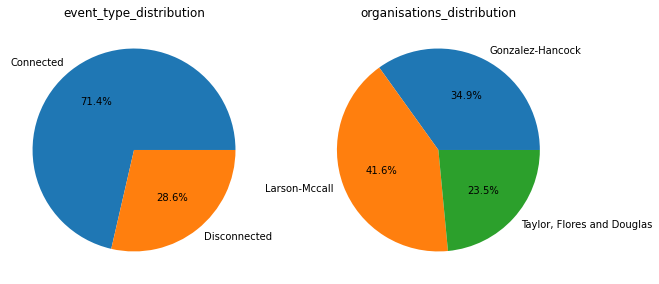

In [13]:
event_type_distribution = df_data.groupby('event_type').size()
print(event_type_distribution)
labels = ["Connected", "Disconnected"]
fig1, (ax1,ax2) = plt.subplots(1,2,figsize=(10,10))
ax1.title.set_text('event_type_distribution')
ax1.pie(event_type_distribution, labels=labels, autopct='%1.1f%%')

organisations_distribution = df_data.groupby('organisation_name').size()
labels2 = df_data['organisation_name'].unique()
ax2.title.set_text('organisations_distribution')
ax2.pie(organisations_distribution, labels=labels2, autopct='%1.1f%%')


### Show time window of the data

In [14]:
start_date = df_data.index.min()
end_date = df_data.index.max()
difference_of_date = end_date - start_date
print('the time window of the data is: ', difference_of_date)
print('First record starts at:', start_date)
print('Last record ends at: ', end_date)


the time window of the data is:  7 days 19:48:23
First record starts at: 2021-02-15 14:46:00
Last record ends at:  2021-02-23 10:34:23


# Deep dive into the Data

*******************************************************************************************************************
Organisation name is:  Gonzalez-Hancock
       event_type organisation_name     place_name asset_name    module_id
count        6820              6820           6820       6820         1531
unique          2                 1              4          8            9
top     Connected  Gonzalez-Hancock  Flynn-Mcgrath  ND-IRJ-15  598-84-6937
freq         5978              6820           4571       4571         1173
---------------------------------------------------------------------------------

place:  Thompson Group
asset_names_within_place:  ['EB-FVF-50' 'SL-UAD-50' 'CH-QKR-84']
asset_types_within_place:  [5 8]
module_id__within_place:  [nan '591-45-2627' '647-80-6730' '598-84-6937' '351-86-2983' '877-10-5115'
 '509-27-8182' '324-50-2046' '478-66-3754']
---------------------------------------------------------------------------------

place:  Flynn-Mcgrath
asset_names_wit

asset_names_within_place:  ['WK-ZGU-09' 'YS-YFI-24']
asset_types_within_place:  [3]
module_id__within_place:  [nan]
---------------------------------------------------------------------------------

place:  Chandler PLC
asset_names_within_place:  ['GF-XQD-42' 'PI-PWV-21']
asset_types_within_place:  [3]
module_id__within_place:  [nan]
---------------------------------------------------------------------------------

place:  Smith Ltd
asset_names_within_place:  ['ZE-KHP-90']
asset_types_within_place:  [3]
module_id__within_place:  [nan]


<Figure size 1080x216 with 0 Axes>

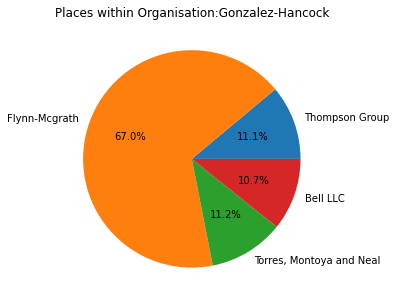

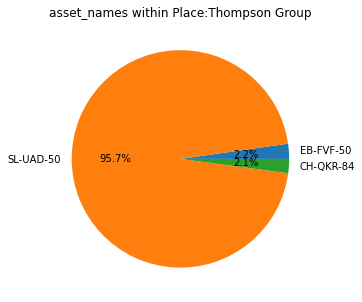

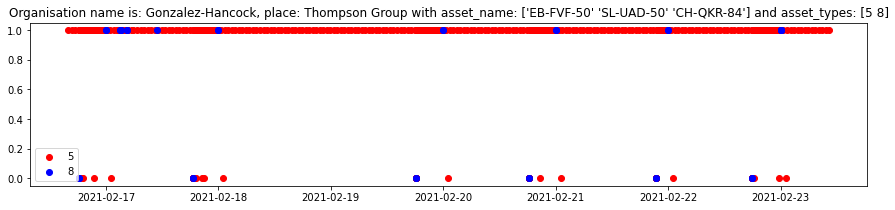

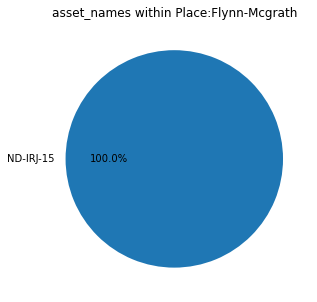

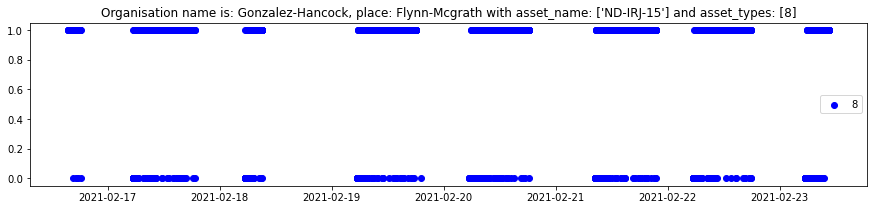

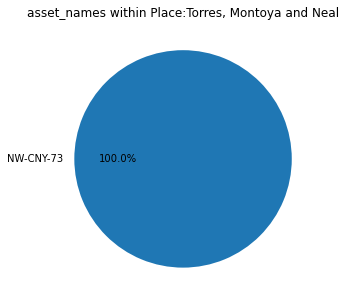

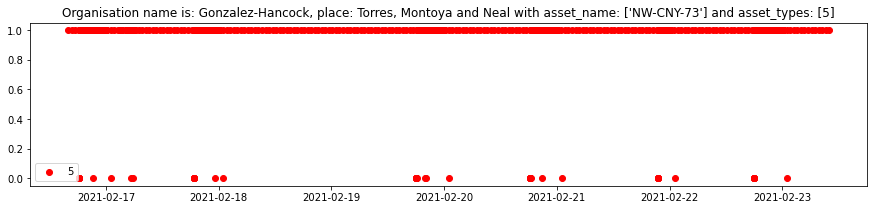

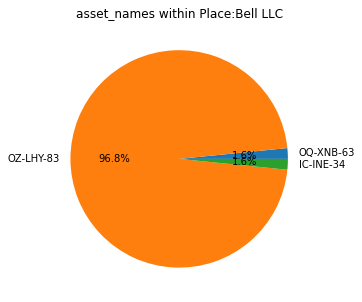

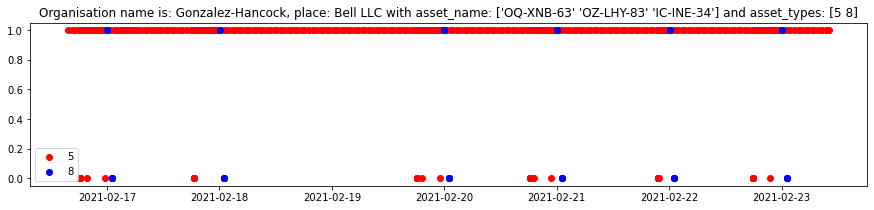

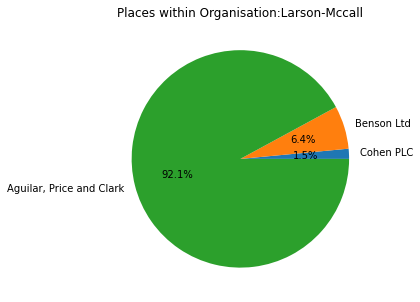

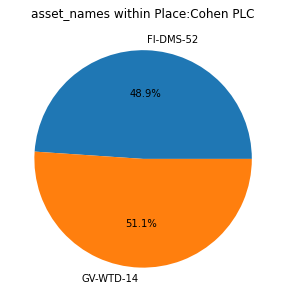

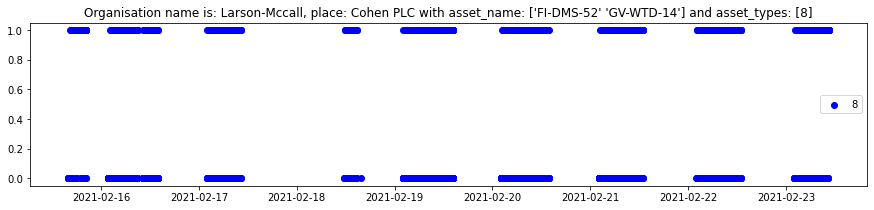

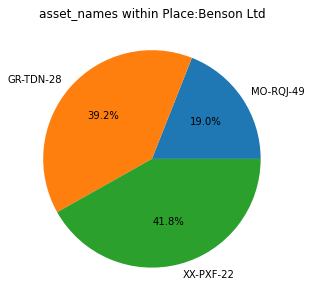

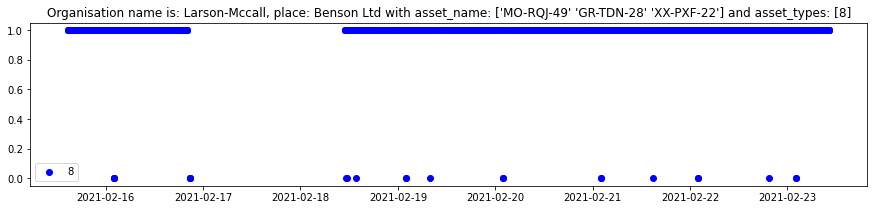

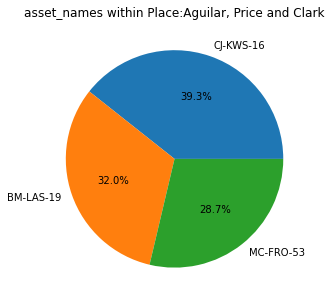

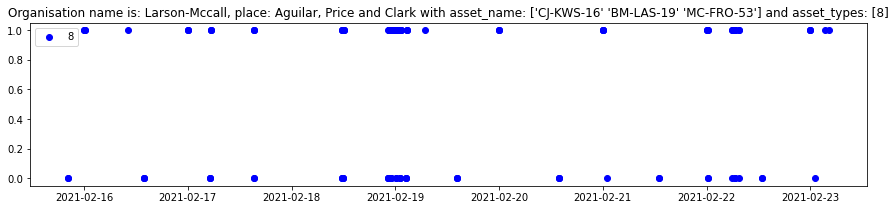

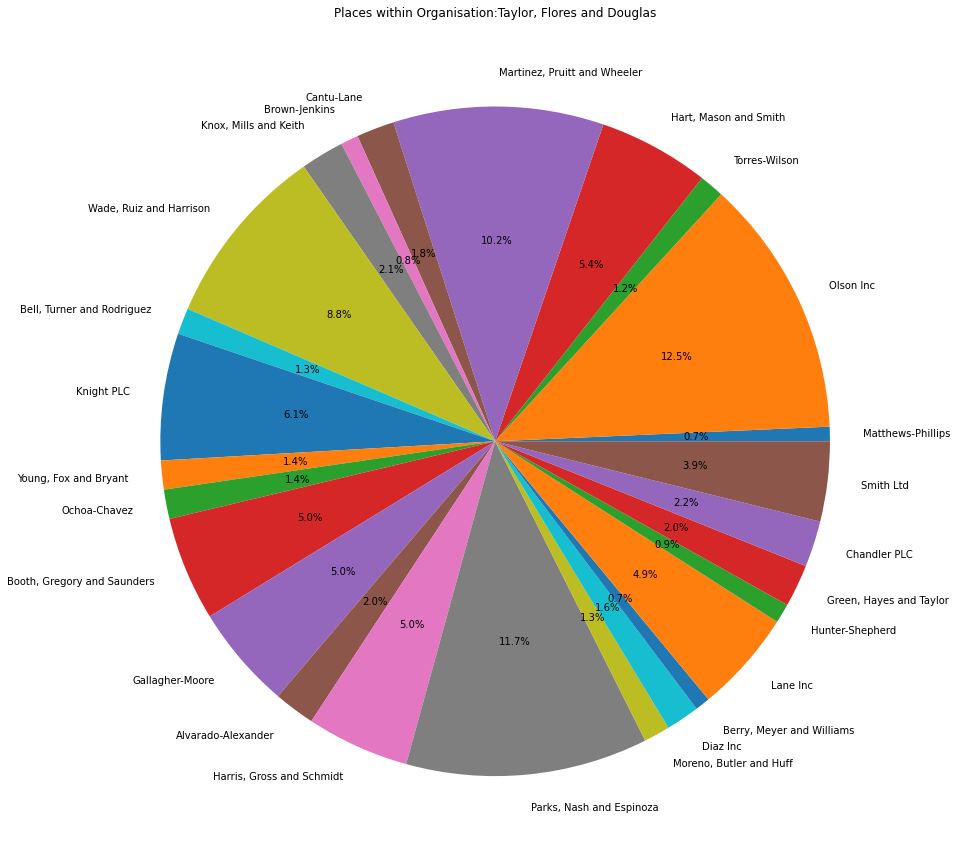

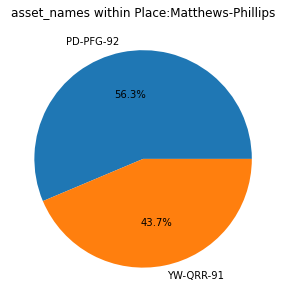

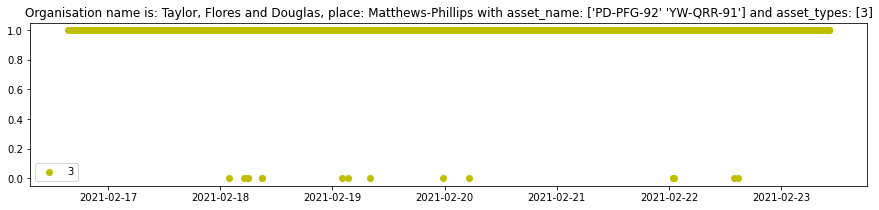

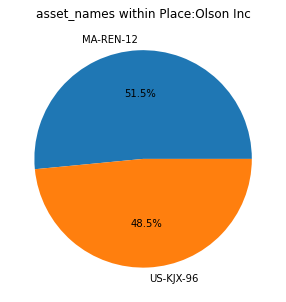

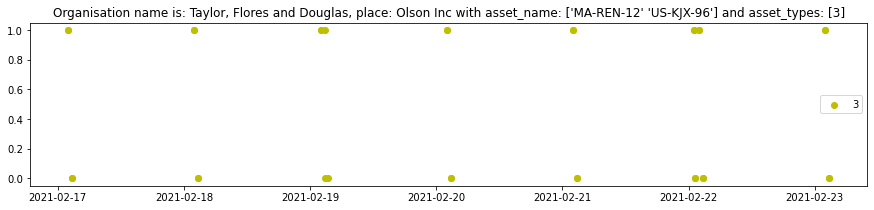

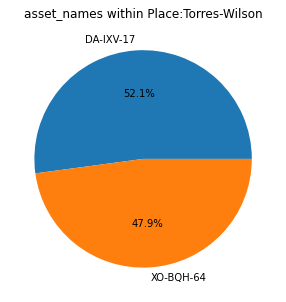

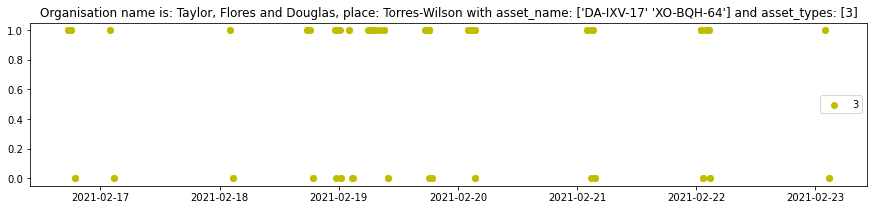

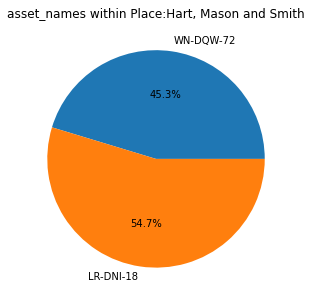

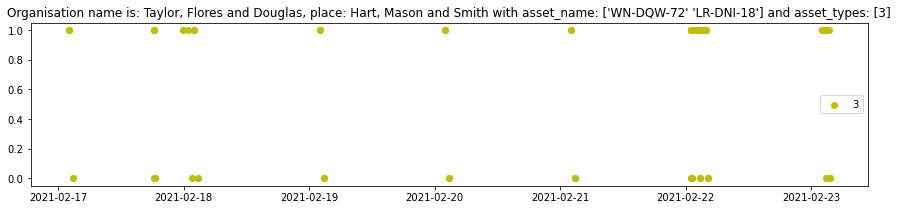

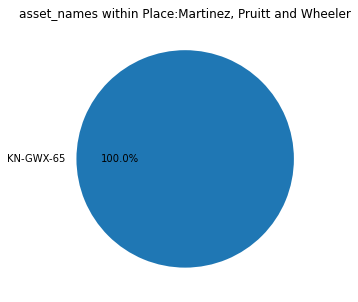

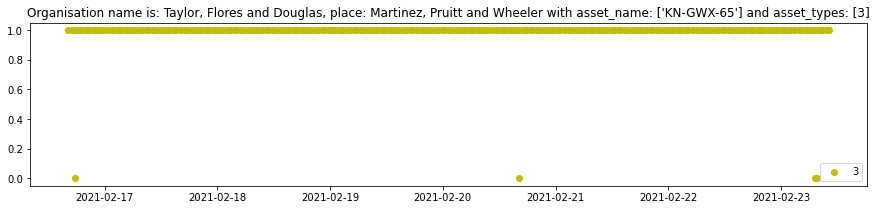

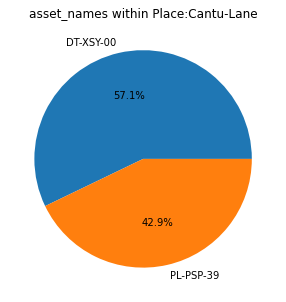

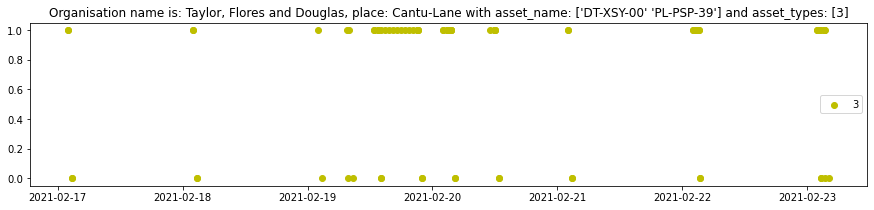

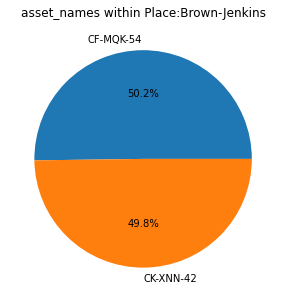

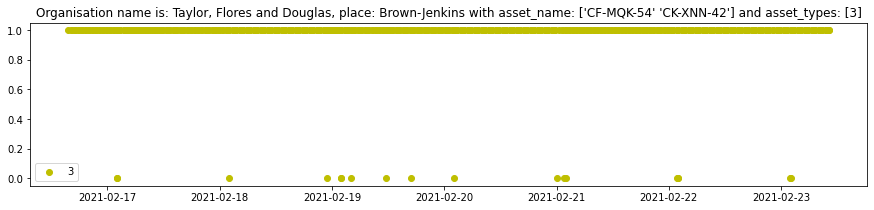

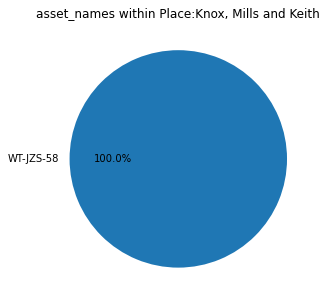

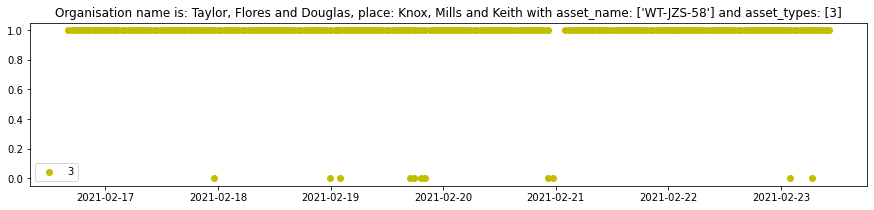

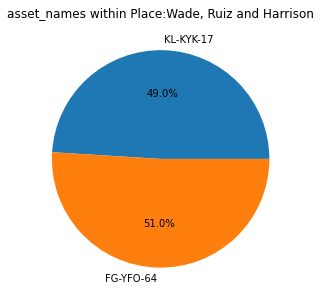

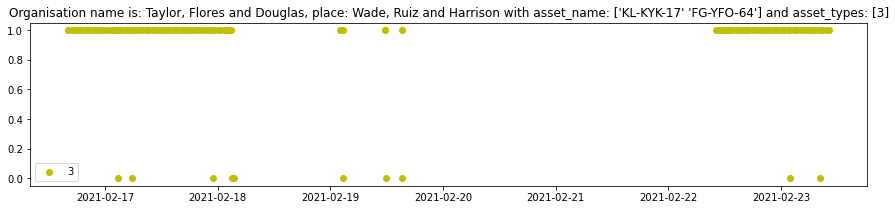

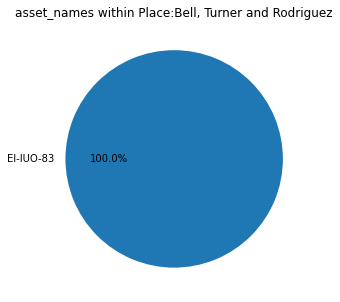

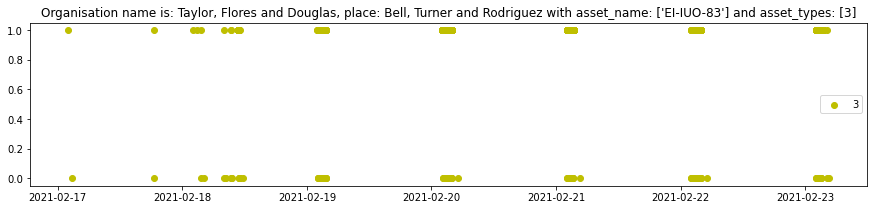

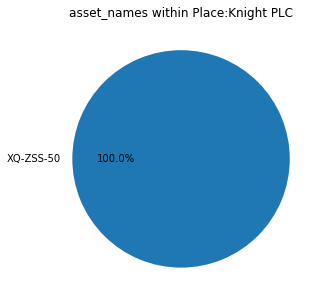

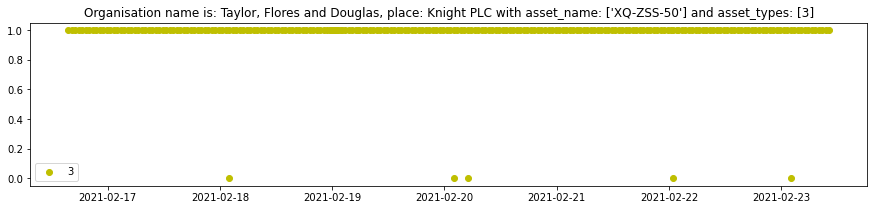

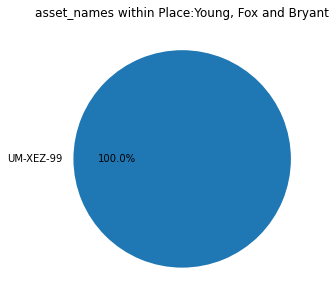

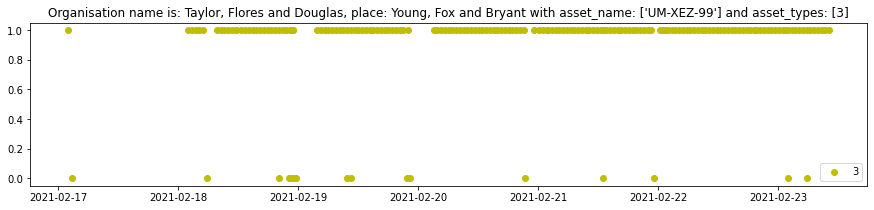

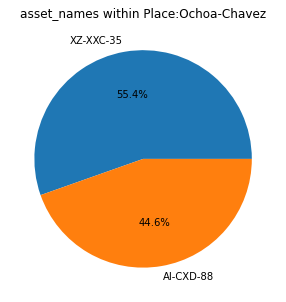

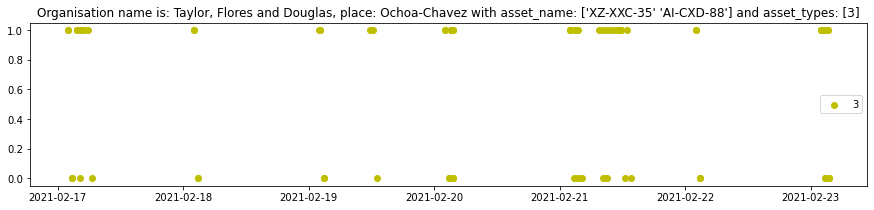

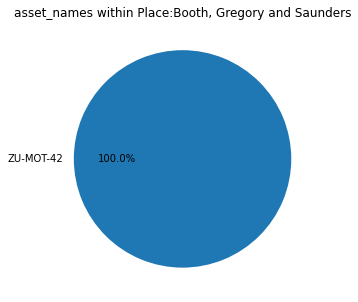

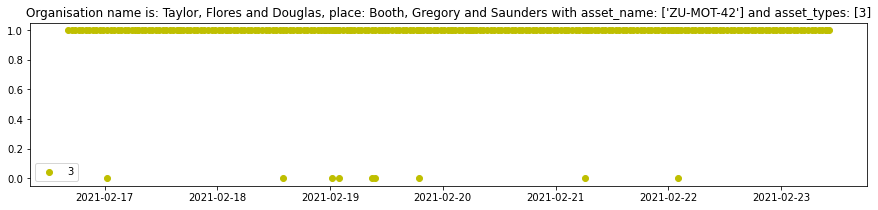

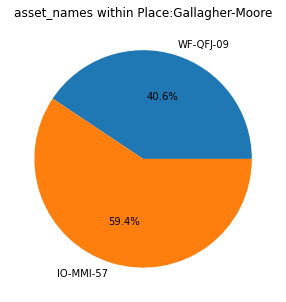

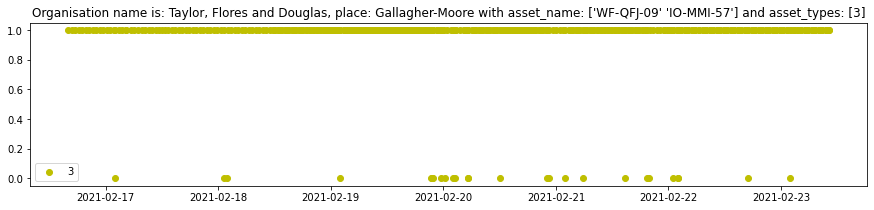

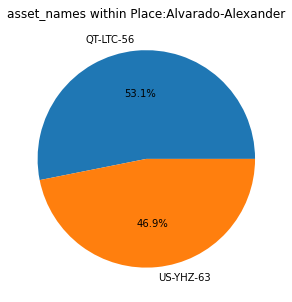

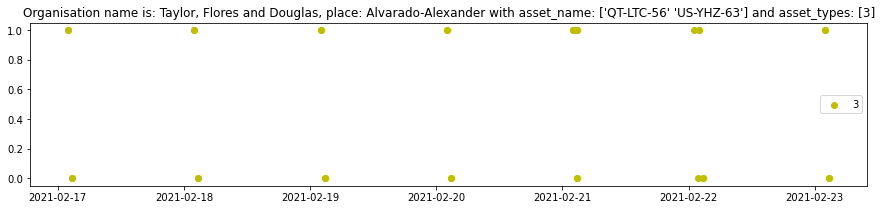

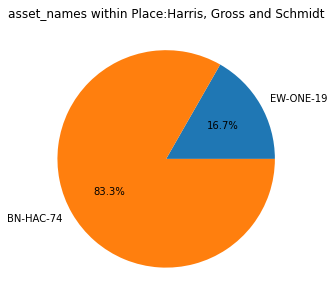

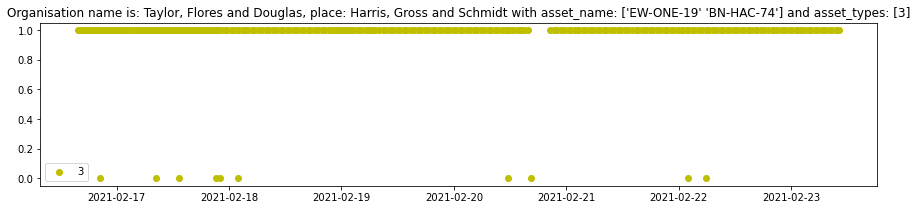

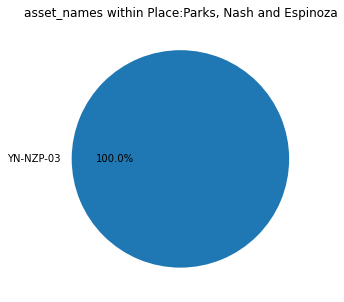

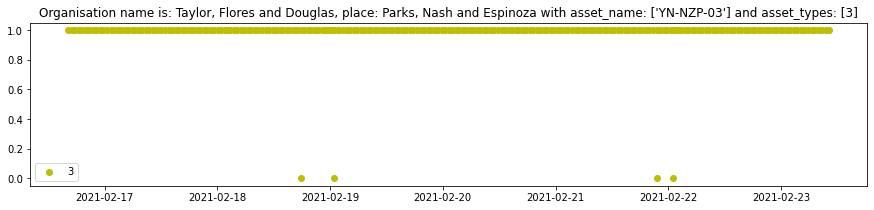

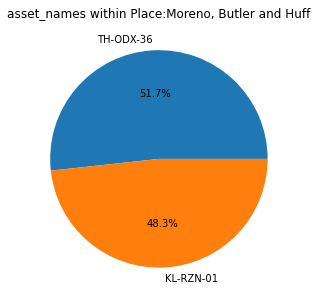

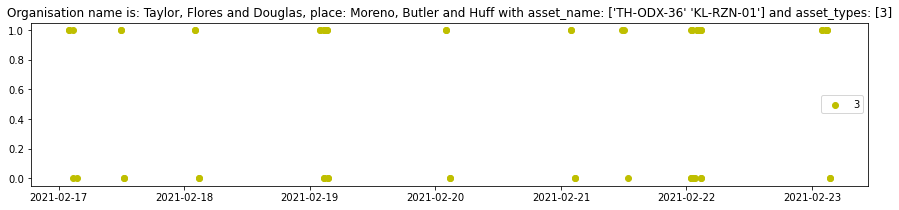

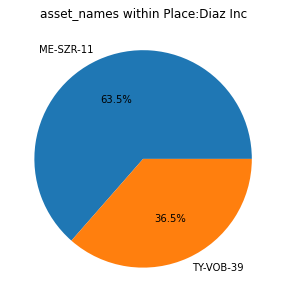

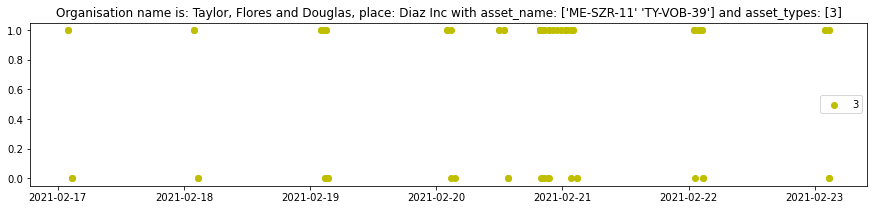

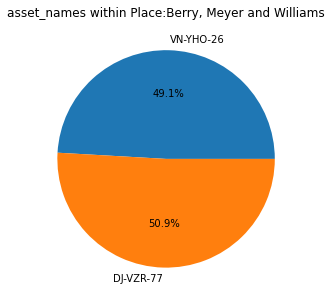

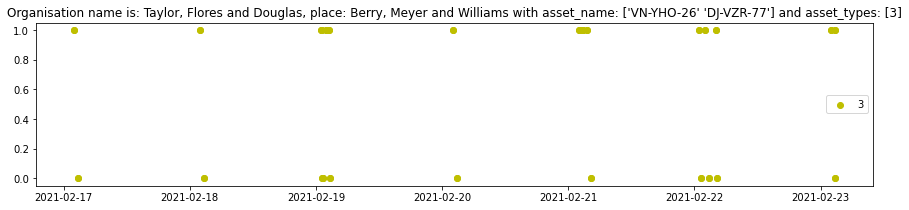

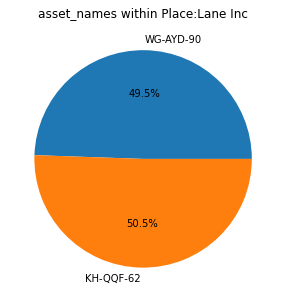

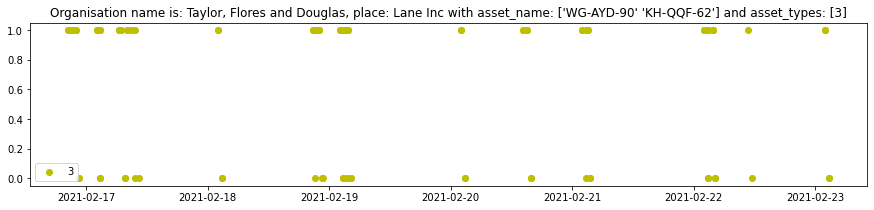

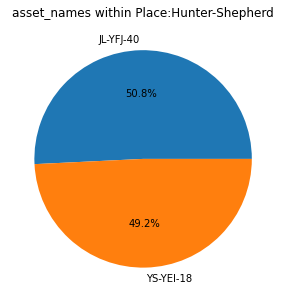

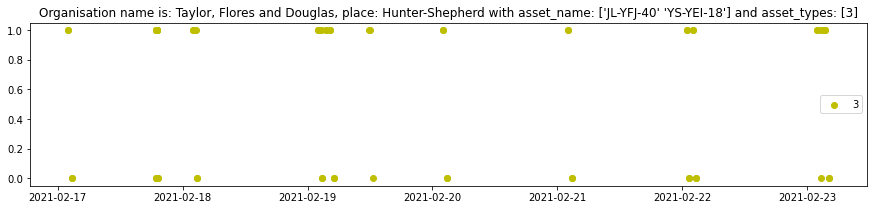

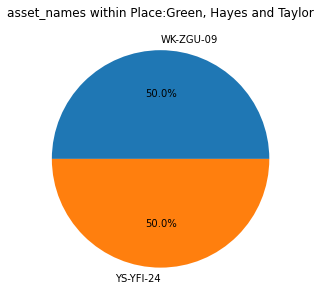

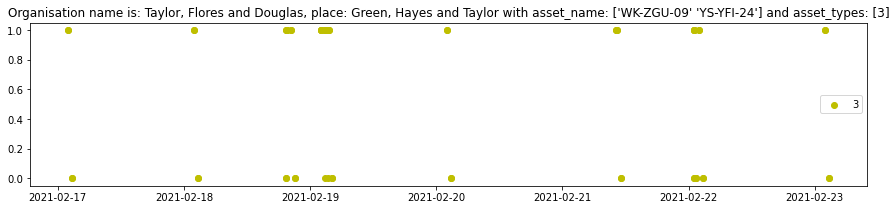

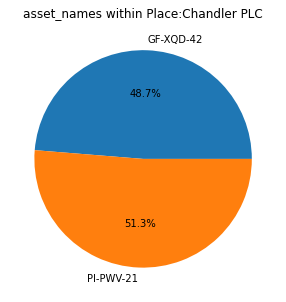

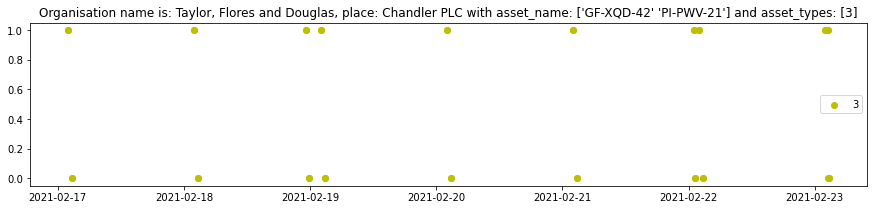

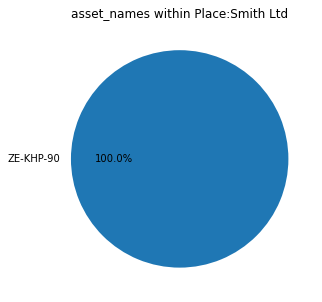

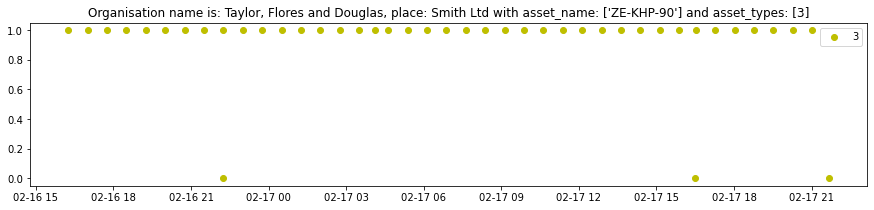

In [15]:
# Split data by organisation_name
orgs = df_data['organisation_name'].unique()
plt.figure(figsize=(15, 3))
colors = ['b', 'c', 'y', 'm', 'r']

for organisation in orgs:    
    org_data = df_data.loc[df_data['organisation_name']==organisation]
    places_within_org = org_data['place_name'].unique()
    print('*******************************************************************************************************************')
    print('Organisation name is: ', organisation)
    print(org_data.describe(include = ['O']))
    
    org_distribution = org_data.groupby('place_name').size()
    labels2 = places_within_org
    if(organisation == 'Taylor, Flores and Douglas'):
        fig1, ax2 = plt.subplots(figsize=(15,20))
    else:
        fig1, ax2 = plt.subplots(figsize=(15,5))
    plc_titles = 'Places within Organisation:' + organisation
    ax2.title.set_text(plc_titles)
    ax2.pie(org_distribution, labels=labels2, autopct='%1.1f%%')
    
    for place in places_within_org:
        print('---------------------------------------------------------------------------------')
        print('\nplace: ', place)
        plc_data = org_data.loc[org_data['place_name']==place]
        asset_names_within_place = plc_data['asset_name'].unique()
        
        plc_distribution = plc_data.groupby('asset_name').size()
        labels2 = asset_names_within_place
        
        fig1, ax2 = plt.subplots(figsize=(15,5))
        asset_titles = 'asset_names within Place:' + place
        ax2.title.set_text(asset_titles)
        ax2.pie(plc_distribution, labels=labels2, autopct='%1.1f%%')
        
#         print('number of asset_name within_place is :',len(asset_names_within_place))
        print('asset_names_within_place: ', asset_names_within_place)
        plt.figure(figsize=(15, 3))
        asset_types_within_place = plc_data['asset_type'].unique()
        asset_names_within_place = plc_data['asset_name'].unique()
#         module_id__within_place = plc_data.groupby('module_id').size()
        module_id__within_place = plc_data['module_id'].unique()
        print('asset_types_within_place: ', asset_types_within_place)
        print('module_id__within_place: ', module_id__within_place)
        for asset_name in asset_names_within_place:
            asset_data = plc_data.loc[plc_data['asset_name']==asset_name]
            asset_data['event_type'] = asset_data['event_type'].replace(['Connected','Disconnected'],[1,0])
            
            graph_title = 'Organisation name is: '+ str(organisation)+', place: '+str(place) + ' with asset_name: '\
                    + str(asset_names_within_place) + ' and asset_types: '+ str(asset_types_within_place)
            plt.title(graph_title)
            asset_types_within_asset_name = asset_data['asset_type'].unique()
            for asset_type in asset_types_within_asset_name:
                asset_type_data = asset_data.loc[asset_data['asset_type']==asset_type]
                if(asset_type == 8):
                    clr = 'b'
                elif(asset_type == 5):
                    clr = 'r'
                else:
                    clr = 'y'
                plt.scatter(asset_type_data.index, asset_type_data['event_type'], color=clr)
                plt.legend(asset_types_within_place)


# Conclusion

1. The data represents 3 Organisations 
2. Each Organisation has unique places
3. Each place within single Organisation contains one or more asset_name and one or more asset_type